<a href="https://colab.research.google.com/github/Shantanu0113/Hotel-Booking-Analysis/blob/main/Shantanu_collab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option("display.max_columns",50)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
hotel= pd.read_csv('/content/drive/MyDrive/Hotel booking analysis /Hotel Bookings.csv')

In [5]:
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
print(hotel.shape)
hotel.describe()

(119390, 32)


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [7]:
hotel.index

RangeIndex(start=0, stop=119390, step=1)

In [8]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [9]:
hotel.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [10]:
print((hotel.isnull().sum()/len(hotel.index))*100)

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

###We have about 13% and 94% of the data null in the columns 'Agent' and 'Company' repectively. This is a large percentage of the data and thus cannot be used for analysis and visualization. Thus we have to drop the columns.

In [11]:
hotel = hotel.drop(['company'], axis=1)

In [12]:
hotel.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             488
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             16340
days_in_waiting_list                  0


In [13]:
hotel['agent'] = hotel['agent'].fillna(0)

In [14]:
hotel.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
agent                               0
days_in_waiting_list                0
customer_type                       0
adr         

###The column country still has some null values which is about 0.408%. As it is a small percentage we can drop the rows as it won't affect our analysis. The same is to be done with the null values for children.

In [15]:
hotel=hotel.dropna(axis=0)

In [16]:
hotel.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

###Renaming the columns to make it easy to understand and later call during analysis.

In [17]:
print(list(hotel.columns))

['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date']


In [18]:
hotel.columns = ['Hotel_name', 'Canceled', 'Lead_time', 'Visit_year', 'Visit_month', 'Visit_week', 'Visit_date', 'Weekend_stay', 'Weekday_stay', 'Adults', 'Children', 'Babies', 'Meal', 'Country', 'Segment', 'Dist_channel', 'Repeated_guest', 'Prev_cancel', 'Prev_bookings', 'Reserved_room', 'Assigned_room', 'Change_booking', 'Deposit_type','Agent', 'Waiting_days', 'Customer_type', 'ADR', 'Parking_space', 'Special_requests', 'Reservation_status', 'Reservation_date']

###Next we need to check for outliers in the data as it could affect our analysis.

In [19]:
list_unique = pd.DataFrame([[i,len(hotel[i].unique())] for i in hotel.columns])
list_unique.columns = ["name" , "unique"]

In [20]:
list_unique

,name,unique
0,Hotel_name,2
1,Canceled,2
2,Lead_time,479
3,Visit_year,3
4,Visit_month,12
5,Visit_week,53
6,Visit_date,31
7,Weekend_stay,15
8,Weekday_stay,33
9,Adults,14


In [21]:
total_var= set(hotel.columns)
cat_var = set(list_unique.name[(list_unique.unique < 14) |
                               (list_unique.name =='Country')])
con_var = total_var - cat_var
print('Categorical variables(',len(cat_var),')\n',cat_var,'\n\n'
      'Continuous variables(',len(con_var),') \n',con_var,)

Categorical variables( 18 )
 {'Hotel_name', 'Assigned_room', 'Dist_channel', 'Parking_space', 'Special_requests', 'Reservation_status', 'Deposit_type', 'Meal', 'Country', 'Customer_type', 'Repeated_guest', 'Babies', 'Children', 'Visit_month', 'Reserved_room', 'Canceled', 'Segment', 'Visit_year'} 

Continuous variables( 13 ) 
 {'Visit_date', 'ADR', 'Waiting_days', 'Adults', 'Weekday_stay', 'Prev_bookings', 'Change_booking', 'Prev_cancel', 'Lead_time', 'Agent', 'Reservation_date', 'Weekend_stay', 'Visit_week'}


###Testing the data set for outliers by taking a few entires and plotting box plot.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

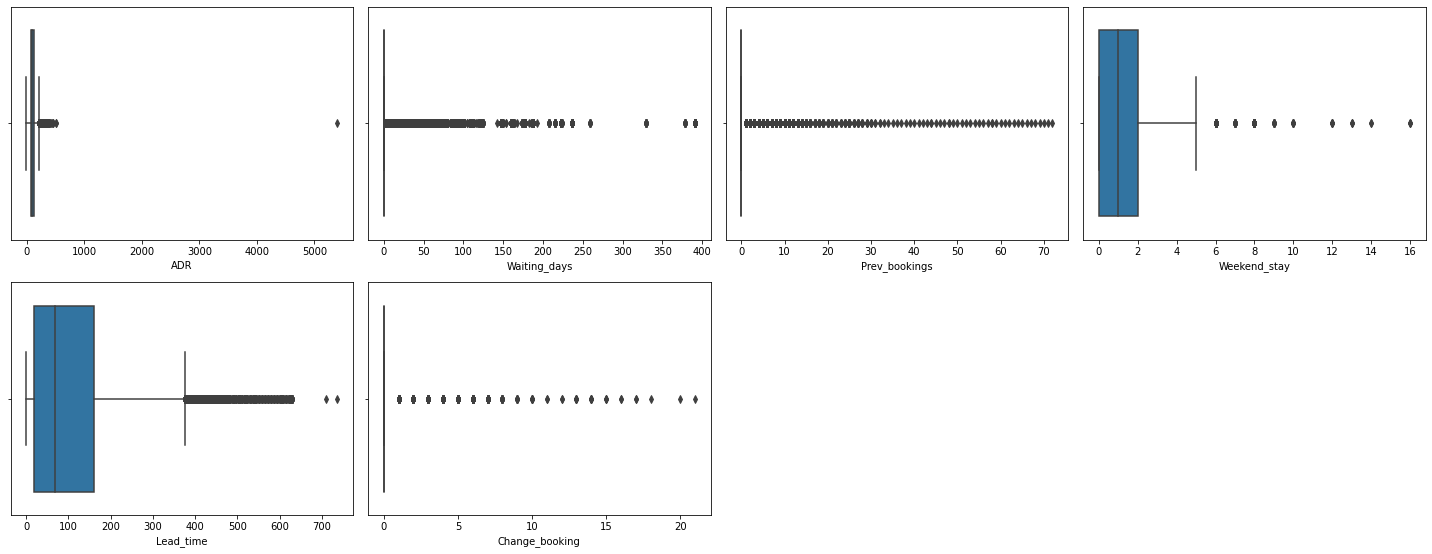

In [22]:

test_list = ['ADR', 'Waiting_days', 'Prev_bookings', 'Weekend_stay', 'Lead_time', 'Change_booking']
plt.figure(figsize=(20,15))
n=1
for test in test_list:
  plt.subplot(4,4,n)
  sns.boxplot(hotel[test])
  n=n+1
  plt.tight_layout()

###So we can see that there are outliers present that need to be treated. Thus we will now check the data for outliers and then work on them.

In [23]:
hotel[con_var].describe()

,Visit_date,ADR,Waiting_days,Adults,Weekday_stay,Prev_bookings,Change_booking,Prev_cancel,Lead_time,Agent,Weekend_stay,Visit_week
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,15.800880,102.003243,2.330754,1.858391,2.502145,0.131634,0.221181,0.087142,104.311435,74.896264,0.928897,27.166555
std,8.780324,50.485862,17.630452,0.578576,1.900168,1.484672,0.652785,0.845869,106.903309,107.145761,0.996216,13.589971
min,1.000000,-6.380000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,8.000000,70.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,18.000000,7.000000,0.000000,16.000000
50%,16.000000,95.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,69.000000,9.000000,1.000000,28.000000
75%,23.000000,126.000000,0.000000,2.000000,3.000000,0.000000,0.000000,0.000000,161.000000,152.000000,2.000000,38.000000
max,31.000000,5400.000000,391.000000,55.000000,41.000000,72.000000,21.000000,26.000000,737.000000,535.000000,16.000000,53.000000


##Summary statistics was performed and the columns from the continuous variables that have outliers are:
* Weekday_stay
* Waiting_days
* Weekend_stay
* Prev_booking
* Prev_cancel
* Adults
* Lead_time
* ADR


In [24]:
#hotel.loc[hotel.Weekday_stay > 10, 'Weekday_stay'] = 10
#hotel.loc[hotel.Waiting_days > 0, 'Waiting_days'] = 1
#hotel.loc[hotel.Weekend_stay > 5, 'Weekend_stay'] = 5
hotel.loc[hotel.Prev_bookings > 0, 'Prev_bookings'] = 1
hotel.loc[hotel.Prev_cancel > 0, 'Prev_cancel'] = 1
hotel.loc[hotel.Adults > 4, 'Adults'] = 4
hotel.loc[hotel.Lead_time > 500, 'Lead_time'] = 500
hotel.loc[hotel.ADR > 600, 'ADR'] = 600

In [25]:
hotel[con_var].describe()

,Visit_date,ADR,Waiting_days,Adults,Weekday_stay,Prev_bookings,Change_booking,Prev_cancel,Lead_time,Agent,Weekend_stay,Visit_week
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,15.800880,101.962872,2.330754,1.855607,2.502145,0.028571,0.221181,0.054223,104.054543,74.896264,0.928897,27.166555
std,8.780324,48.112682,17.630452,0.488194,1.900168,0.166597,0.652785,0.226458,105.834923,107.145761,0.996216,13.589971
min,1.000000,-6.380000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,8.000000,70.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,18.000000,7.000000,0.000000,16.000000
50%,16.000000,95.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,69.000000,9.000000,1.000000,28.000000
75%,23.000000,126.000000,0.000000,2.000000,3.000000,0.000000,0.000000,0.000000,161.000000,152.000000,2.000000,38.000000
max,31.000000,600.000000,391.000000,4.000000,41.000000,1.000000,21.000000,1.000000,500.000000,535.000000,16.000000,53.000000


In [26]:
hotel[cat_var].describe()

,Parking_space,Special_requests,Repeated_guest,Babies,Children,Canceled,Visit_year
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.061885,0.571683,0.032011,0.007948,0.104207,0.371352,2016.157656
std,0.244172,0.792678,0.176029,0.097380,0.399172,0.483168,0.707459
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2017.000000
max,8.000000,5.000000,1.000000,10.000000,10.000000,1.000000,2017.000000


###Observed outliers are in the columns:
* Babies
* Parking_space
* Children

In [27]:
hotel.loc[hotel.Babies > 3, 'Babies'] = 0
hotel.loc[hotel.Children > 4, 'Children'] = 0
hotel.loc[hotel.Parking_space > 5, 'Parking_space'] = 5

In [28]:
hotel[cat_var].describe()

,Parking_space,Special_requests,Repeated_guest,Babies,Children,Canceled,Visit_year
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.061835,0.571683,0.032011,0.007788,0.104123,0.371352,2016.157656
std,0.242838,0.792678,0.176029,0.089236,0.398139,0.483168,0.707459
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2017.000000
max,5.000000,5.000000,1.000000,2.000000,3.000000,1.000000,2017.000000


###Preparation of the data.

In [29]:
#To find the total number of occupants.
#first to find the total number of kids.
hotel['Children'] = hotel['Children'].astype('int64')
hotel['Kids'] = hotel.Children + hotel.Babies

hotel['Occupants'] = hotel.Adults + hotel.Kids
hotel['Total_stay'] = hotel.Weekend_stay + hotel.Weekday_stay

In [ ]:


# hotel['Canceled'] = hotel['Canceled'].astype('str')
# hotel['Repeated_guest'] = hotel['Repeated_guest'].astype('str')

In [30]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118898 entries, 0 to 119389
Data columns (total 34 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Hotel_name          118898 non-null  object 
 1   Canceled            118898 non-null  int64  
 2   Lead_time           118898 non-null  int64  
 3   Visit_year          118898 non-null  int64  
 4   Visit_month         118898 non-null  object 
 5   Visit_week          118898 non-null  int64  
 6   Visit_date          118898 non-null  int64  
 7   Weekend_stay        118898 non-null  int64  
 8   Weekday_stay        118898 non-null  int64  
 9   Adults              118898 non-null  int64  
 10  Children            118898 non-null  int64  
 11  Babies              118898 non-null  int64  
 12  Meal                118898 non-null  object 
 13  Country             118898 non-null  object 
 14  Segment             118898 non-null  object 
 15  Dist_channel        118898 non-nul

In [31]:
import datetime
from time import strptime

hotel['Reservation_date'] = pd.to_datetime(hotel['Reservation_date'])

In [32]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118898 entries, 0 to 119389
Data columns (total 34 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Hotel_name          118898 non-null  object        
 1   Canceled            118898 non-null  int64         
 2   Lead_time           118898 non-null  int64         
 3   Visit_year          118898 non-null  int64         
 4   Visit_month         118898 non-null  object        
 5   Visit_week          118898 non-null  int64         
 6   Visit_date          118898 non-null  int64         
 7   Weekend_stay        118898 non-null  int64         
 8   Weekday_stay        118898 non-null  int64         
 9   Adults              118898 non-null  int64         
 10  Children            118898 non-null  int64         
 11  Babies              118898 non-null  int64         
 12  Meal                118898 non-null  object        
 13  Country             118898 no

In [33]:
hotel.duplicated().sum()

32004

In [34]:
hotel = hotel.drop_duplicates(keep='first')

In [35]:
hotel.shape

(86894, 34)

In [36]:
hotel.head()

,Hotel_name,Canceled,Lead_time,Visit_year,Visit_month,Visit_week,Visit_date,Weekend_stay,Weekday_stay,Adults,Children,Babies,Meal,Country,Segment,Dist_channel,Repeated_guest,Prev_cancel,Prev_bookings,Reserved_room,Assigned_room,Change_booking,Deposit_type,Agent,Waiting_days,Customer_type,ADR,Parking_space,Special_requests,Reservation_status,Reservation_date,Kids,Occupants,Total_stay
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2,0
1,Resort Hotel,0,500,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,0,1,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,0,1,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,0,2,2


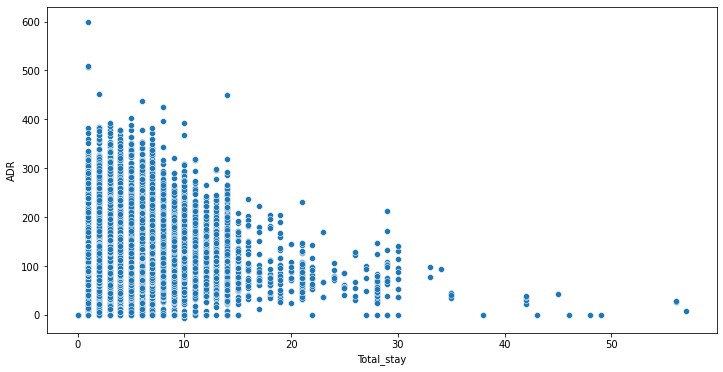

In [40]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=hotel, x='Total_stay', y='ADR')

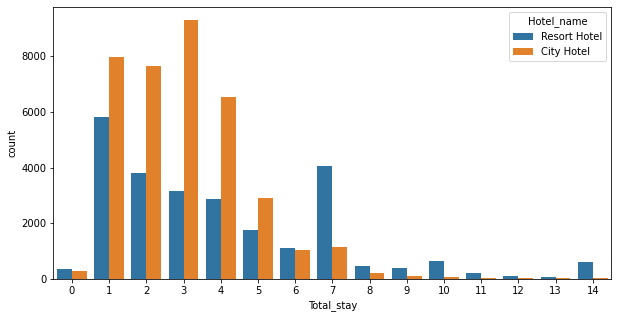

In [41]:
actual_guests = hotel[hotel['Canceled']==0]
d1= actual_guests[actual_guests['Total_stay']<15]
plt.figure(figsize=(10,5))
sns.countplot(x= d1['Total_stay'],hue= d1['Hotel_name'])

In [ ]:
d1= hotel[hotel['Canceled']==0]

In [ ]:
d1.head()

,Hotel_name,Canceled,Lead_time,Visit_year,Visit_month,Visit_week,Visit_date,Weekend_stay,Weekday_stay,Adults,Children,Babies,Meal,Country,Segment,Dist_channel,Repeated_guest,Prev_cancel,Prev_bookings,Reserved_room,Assigned_room,Change_booking,Deposit_type,Agent,Waiting_days,Customer_type,ADR,Parking_space,Special_requests,Reservation_status,Reservation_date,Kids,Occupants,Total_stay
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2,0
1,Resort Hotel,0,500,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,0,1,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,0,1,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,0,2,2


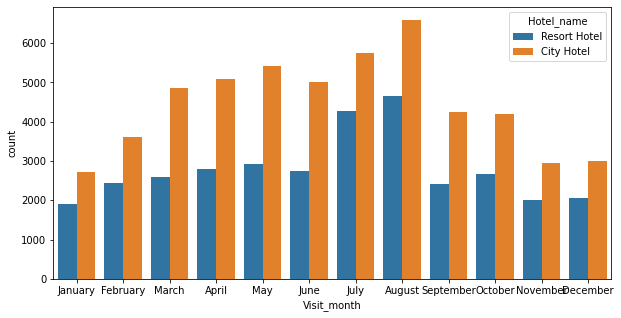

In [42]:
Months_odr= ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.figure(figsize= (10,5))
#hotel['Month']= hotel['Reservation_date'].apply(lambda x: x.strftime("%Y-%m-%d") [5:7])
sns.countplot(x=hotel['Visit_month'], data= hotel, order=Months_odr, hue='Hotel_name')

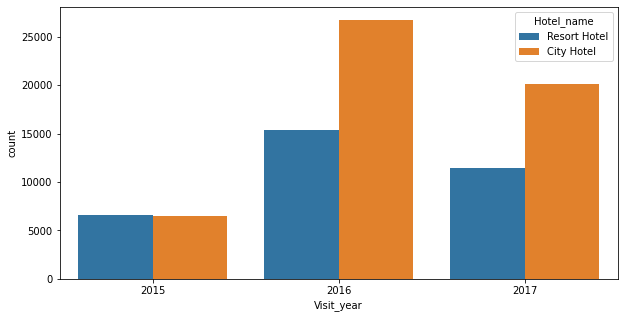

In [43]:
plt.figure(figsize=(10,5))
sns.countplot(x= hotel['Visit_year'] ,data=hotel ,hue='Hotel_name')

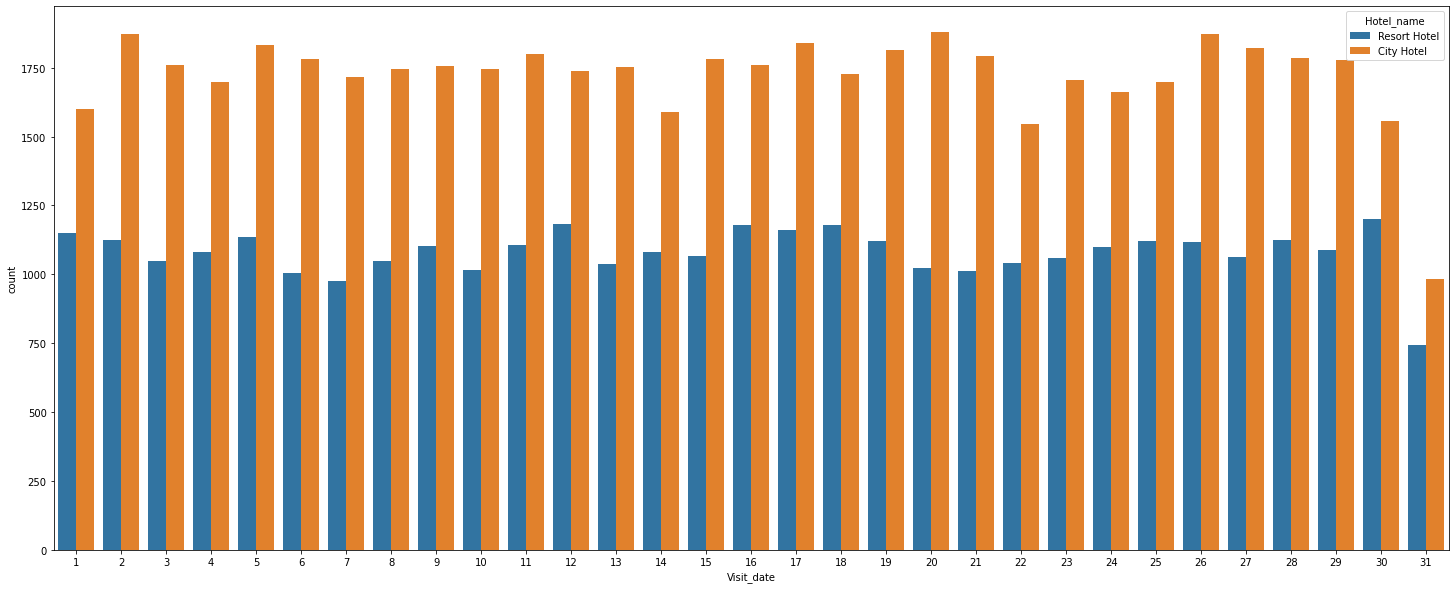

In [44]:
plt.figure(figsize=(25,10))
sns.countplot(x='Visit_date', data=hotel, hue='Hotel_name')

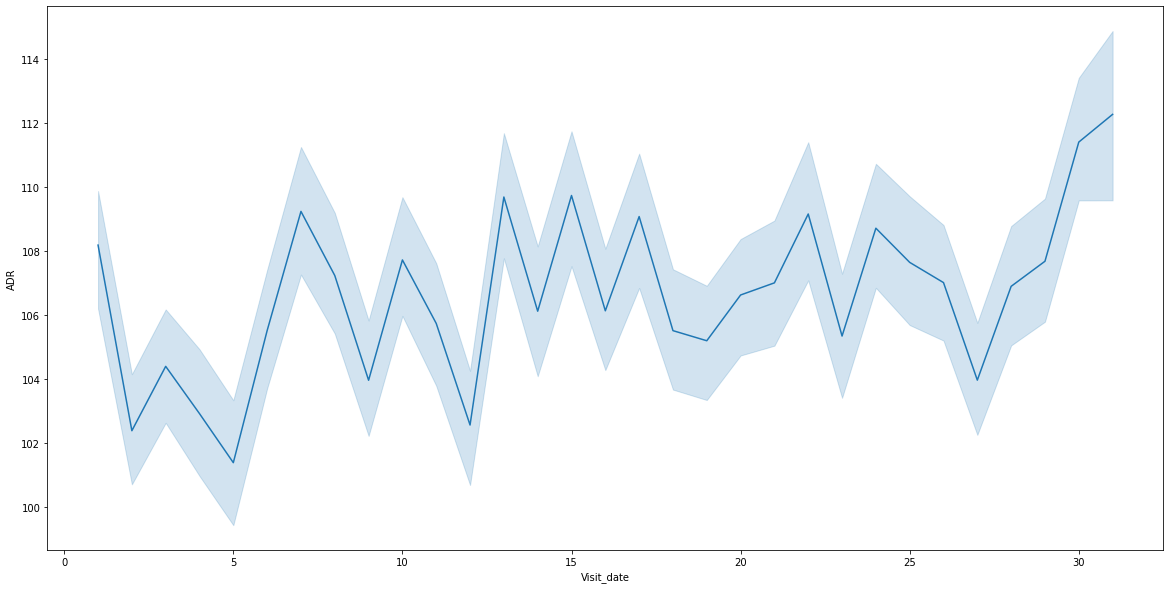

In [45]:
plt.figure(figsize=(20,10))
sns.lineplot(x = 'Visit_date', y = 'ADR', data=hotel)

In [ ]:
# single_occ= actual_guests[(actual_guests['Adults']==1) and (actual_guests['Kids']==0)]
# adult_occ= actual_guests[(actual_guests['Adults']==2) and (actual_guests['Kids']==0)
# family_occ= actual_guests[actual_guests['Adults']+ actual_guests['Kids']>2]

In [46]:
actual_guests['Type_of_occ'] = np.nan
actual_guests.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Hotel_name,Canceled,Lead_time,Visit_year,Visit_month,Visit_week,Visit_date,Weekend_stay,Weekday_stay,Adults,Children,Babies,Meal,Country,Segment,Dist_channel,Repeated_guest,Prev_cancel,Prev_bookings,Reserved_room,Assigned_room,Change_booking,Deposit_type,Agent,Waiting_days,Customer_type,ADR,Parking_space,Special_requests,Reservation_status,Reservation_date,Kids,Occupants,Total_stay,Type_of_occ
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2,0,NaN
1,Resort Hotel,0,500,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2,0,NaN
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,0,1,1,NaN
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,0,1,1,NaN
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,0,2,2,NaN


In [47]:
#hotel = hotel.drop(['Type_of_occ'], axis=1)
actual_guests = actual_guests.drop(['Type_of_occ'], axis=1)

In [48]:
conditions = [(actual_guests['Adults']==1) & (actual_guests['Kids']==0),
  (actual_guests['Adults']==2) & (actual_guests['Kids']==0),
  (actual_guests['Adults']+ actual_guests['Kids']>=2)]

values = ['Single','Couple','Family']

actual_guests['Type_of_occ'] = np.select(conditions, values)

In [49]:
actual_guests.head(50)

,Hotel_name,Canceled,Lead_time,Visit_year,Visit_month,Visit_week,Visit_date,Weekend_stay,Weekday_stay,Adults,Children,Babies,Meal,Country,Segment,Dist_channel,Repeated_guest,Prev_cancel,Prev_bookings,Reserved_room,Assigned_room,Change_booking,Deposit_type,Agent,Waiting_days,Customer_type,ADR,Parking_space,Special_requests,Reservation_status,Reservation_date,Kids,Occupants,Total_stay,Type_of_occ
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01,0,2,0,Couple
1,Resort Hotel,0,500,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01,0,2,0,Couple
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,0,1,1,Single
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,0,1,1,Single
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03,0,2,2,Couple
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,0.0,0,Transient,107.00,0,0,Check-Out,2015-07-03,0,2,2,Couple
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,0,Transient,103.00,0,1,Check-Out,2015-07-03,0,2,2,Couple
11,Resort Hotel,0,35,2015,July,27,1,0,4,2,0,0,HB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,240.0,0,Transient,145.00,0,0,Check-Out,2015-07-05,0,2,4,Couple
12,Resort Hotel,0,68,2015,July,27,1,0,4,2,0,0,BB,USA,Online TA,TA/TO,0,0,0,D,E,0,No Deposit,240.0,0,Transient,97.00,0,3,Check-Out,2015-07-05,0,2,4,Couple
13,Resort Hotel,0,18,2015,July,27,1,0,4,2,1,0,HB,ESP,Online TA,TA/TO,0,0,0,G,G,1,No Deposit,241.0,0,Transient,154.77,0,1,Check-Out,2015-07-05,1,3,4,Family


In [ ]:
actual_guests.loc[actual_guests['Type_of_occ']=='0']

,Hotel_name,Canceled,Lead_time,Visit_year,Visit_month,Visit_week,Visit_date,Weekend_stay,Weekday_stay,Adults,Children,Babies,Meal,Country,Segment,Dist_channel,Repeated_guest,Prev_cancel,Prev_bookings,Reserved_room,Assigned_room,Change_booking,Deposit_type,Agent,Waiting_days,Customer_type,ADR,Parking_space,Special_requests,Reservation_status,Reservation_date,Kids,Occupants,Total_stay,Type_of_occ


In [50]:
actual_guests= actual_guests[actual_guests.Type_of_occ!= '0']

In [51]:
actual_guests['Visit_month']= pd.Categorical(actual_guests['Visit_month'],Months_odr)

In [61]:
type_df= actual_guests.groupby(['Visit_month','Type_of_occ'],sort= True)['Visit_month'].count().unstack()
type_df
#type_df['Visit_month']= pd.categorical(type_df['Visit_month'], categories=Months_odr, ordered= True)

Type_of_occ,Couple,Family,Single
Visit_month,,,
January,2087,352,1152
February,2842,639,1130
March,3583,605,1414
April,3573,815,1070
May,3981,621,1284
June,3685,739,967
July,4311,1864,644
August,4841,2105,653
September,3474,494,1045


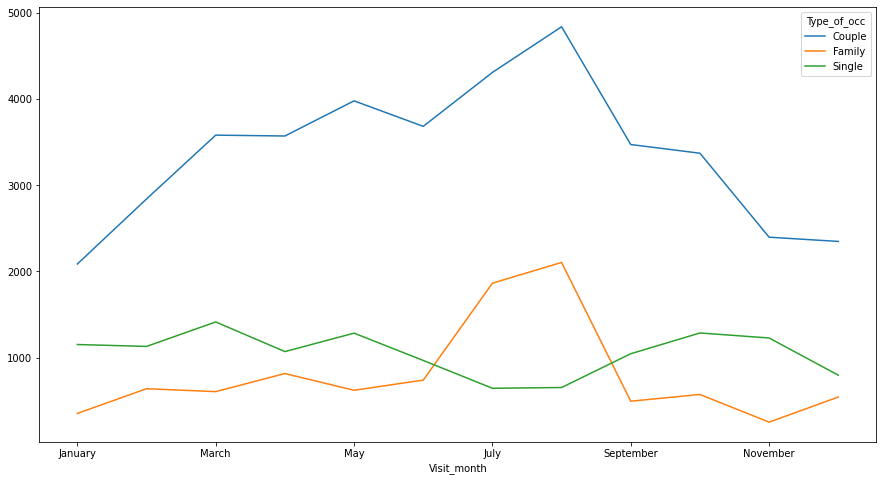

In [90]:
#plt.figure(figsize=(100,50))
type_df.plot()
plt.gcf().set_size_inches(15, 8)